w[0]: 0.393906  b: -0.031804


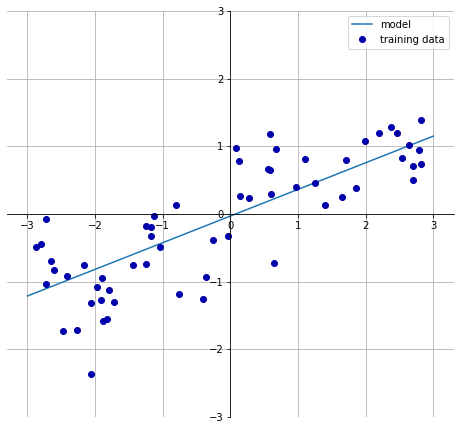

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [ ]:
# 릿지 회귀 Ridge Regression

In [4]:
# 라쏘 회귀 Lasso Regression
X, y = mglearn.datasets.load_extended_boston()

In [5]:
X.shape
# 104개 차원이 존재
# 차원을 줄여서 OVERFITTING을 해결해야함 (꼭 필요한 차원(특성)만 사용하면 모델 이해도 상승, 과대적합 해결)

(506, 104)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

NameError: name 'X' is not defined

In [11]:

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 다소 큰 성능차이로 인해 모델이 과대적합되었다는 사실을 도출해낼 수 있다.

0.9520519609032729
0.607472195966585


In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [3]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, '^', label = 'alpha 1')
plt.plot(ridge10.coef_, 's', label = 'alpha 10')
plt.plot(ridge01.coef_, 'v', label = 'alpha 01')
## alpha 값이 증가 => 규제도 상승

# 선형회귀
##plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.legend()
plt.show()

NameError: name 'ridge' is not defined

In [23]:
# 계수 알아보기
ridge.coef_.shape
# X_train.shape = (379, 104)     104개의 차원을 가지고 있으므로 계수는 104개

(104,)

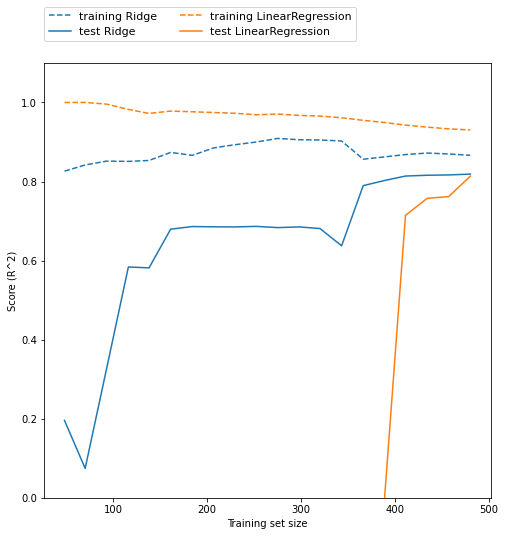

In [34]:
plt.figure(figsize=(8,8))
mglearn.plots.plot_ridge_n_samples()

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [36]:
lasso.score(X_train, y_train)

0.29323768991114607

In [37]:
lasso.score(X_test, y_test)

0.20937503255272294

In [38]:
import numpy as np
np.sum(lasso.coef_ != 0)

4

In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0))

0.8962226511086497
0.7656571174549983
33


In [47]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print(np.sum(lasso00001.coef_ != 0))

96


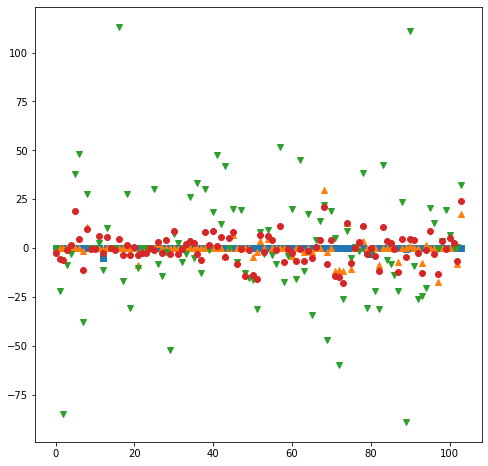

In [48]:
plt.figure(figsize=(8,8))
plt.plot(lasso.coef_, 's')
plt.plot(lasso001.coef_, '^')
plt.plot(lasso00001.coef_, 'v')

plt.plot(ridge01.coef_, 'o')
plt.show() 

In [4]:
# 분류용 선형 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [52]:
X, y = mglearn.datasets.make_forge()

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


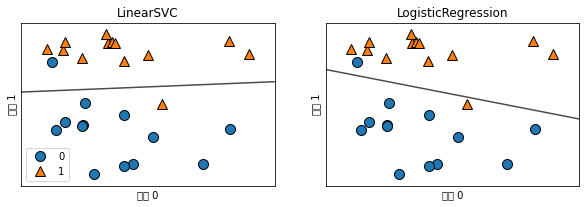

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

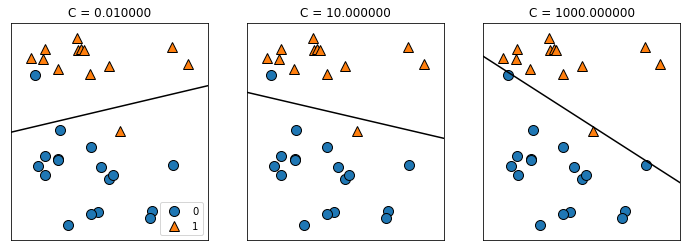

In [61]:
mglearn.plots.plot_linear_svc_regularization()

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                   random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))
print(np.sum(logreg.coef_ != 0))
# 매개변수 30개 출력
# 학습, 테스트 셋의 점수가 너무 똑같으면 과소적합(underfit)이 의심된다.
# default value C = 1  이므로 과소적합인것 같음.
## 모델의 제약을 더 풀어주기 위해 C를 증가시켜보자

0.9577464788732394
0.958041958041958
30


In [70]:
logreg100 = LogisticRegression(C = 100, max_iter=5000).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))
# 훈련세트의 정확도 증가, 테스트세트의 정확도 조금 증가 => 복잡도가 높은 모델일수록 성능이 좋음을 말해준다.
## 이번엔 규제를 더 강하게 하기 위해 C값을 0.01로 해보자.

0.9835680751173709
0.965034965034965


In [71]:
logreg001 = LogisticRegression(C = 0.01, max_iter=5000).fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))
# 이미 과소적합된 모델에서 왼쪽으로 더 이동하게 되니까 훈련, 테스트세트의 정확도는 기본 매개변수일 때보다 낮아짐.

0.9530516431924883
0.951048951048951


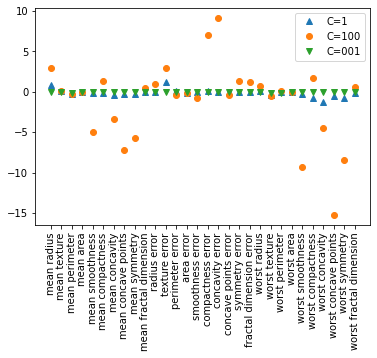

In [82]:
plt.plot(logreg.coef_.T, '^', label = 'C=1')
plt.plot(logreg100.coef_.T, 'o', label = 'C=100')
plt.plot(logreg001.coef_.T, 'v', label = 'C=001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.legend()

In [ ]:
### 결정트리 Decision Tree

In [88]:
# !pip install graphviz
# https://graphviz.org/download/

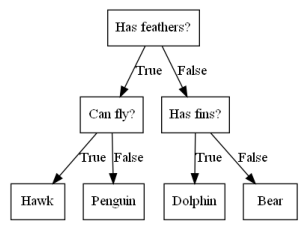

In [2]:
mglearn.plots.plot_animal_tree()

In [3]:
from sklearn.tree import DecisionTreeClassifier

